In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("fetch_california_housing.csv")
del df["Unnamed: 0"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
# shape и types данных
print(df.shape)
print(df.dtypes)

(20641, 9)
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20641 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20639 non-null  float64
 3   AveBedrms    20637 non-null  float64
 4   Population   20639 non-null  float64
 5   AveOccup     20639 non-null  float64
 6   Latitude     20639 non-null  float64
 7   Longitude    20641 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Визуализация данных (зависимости в данных линейные/нелиейные)

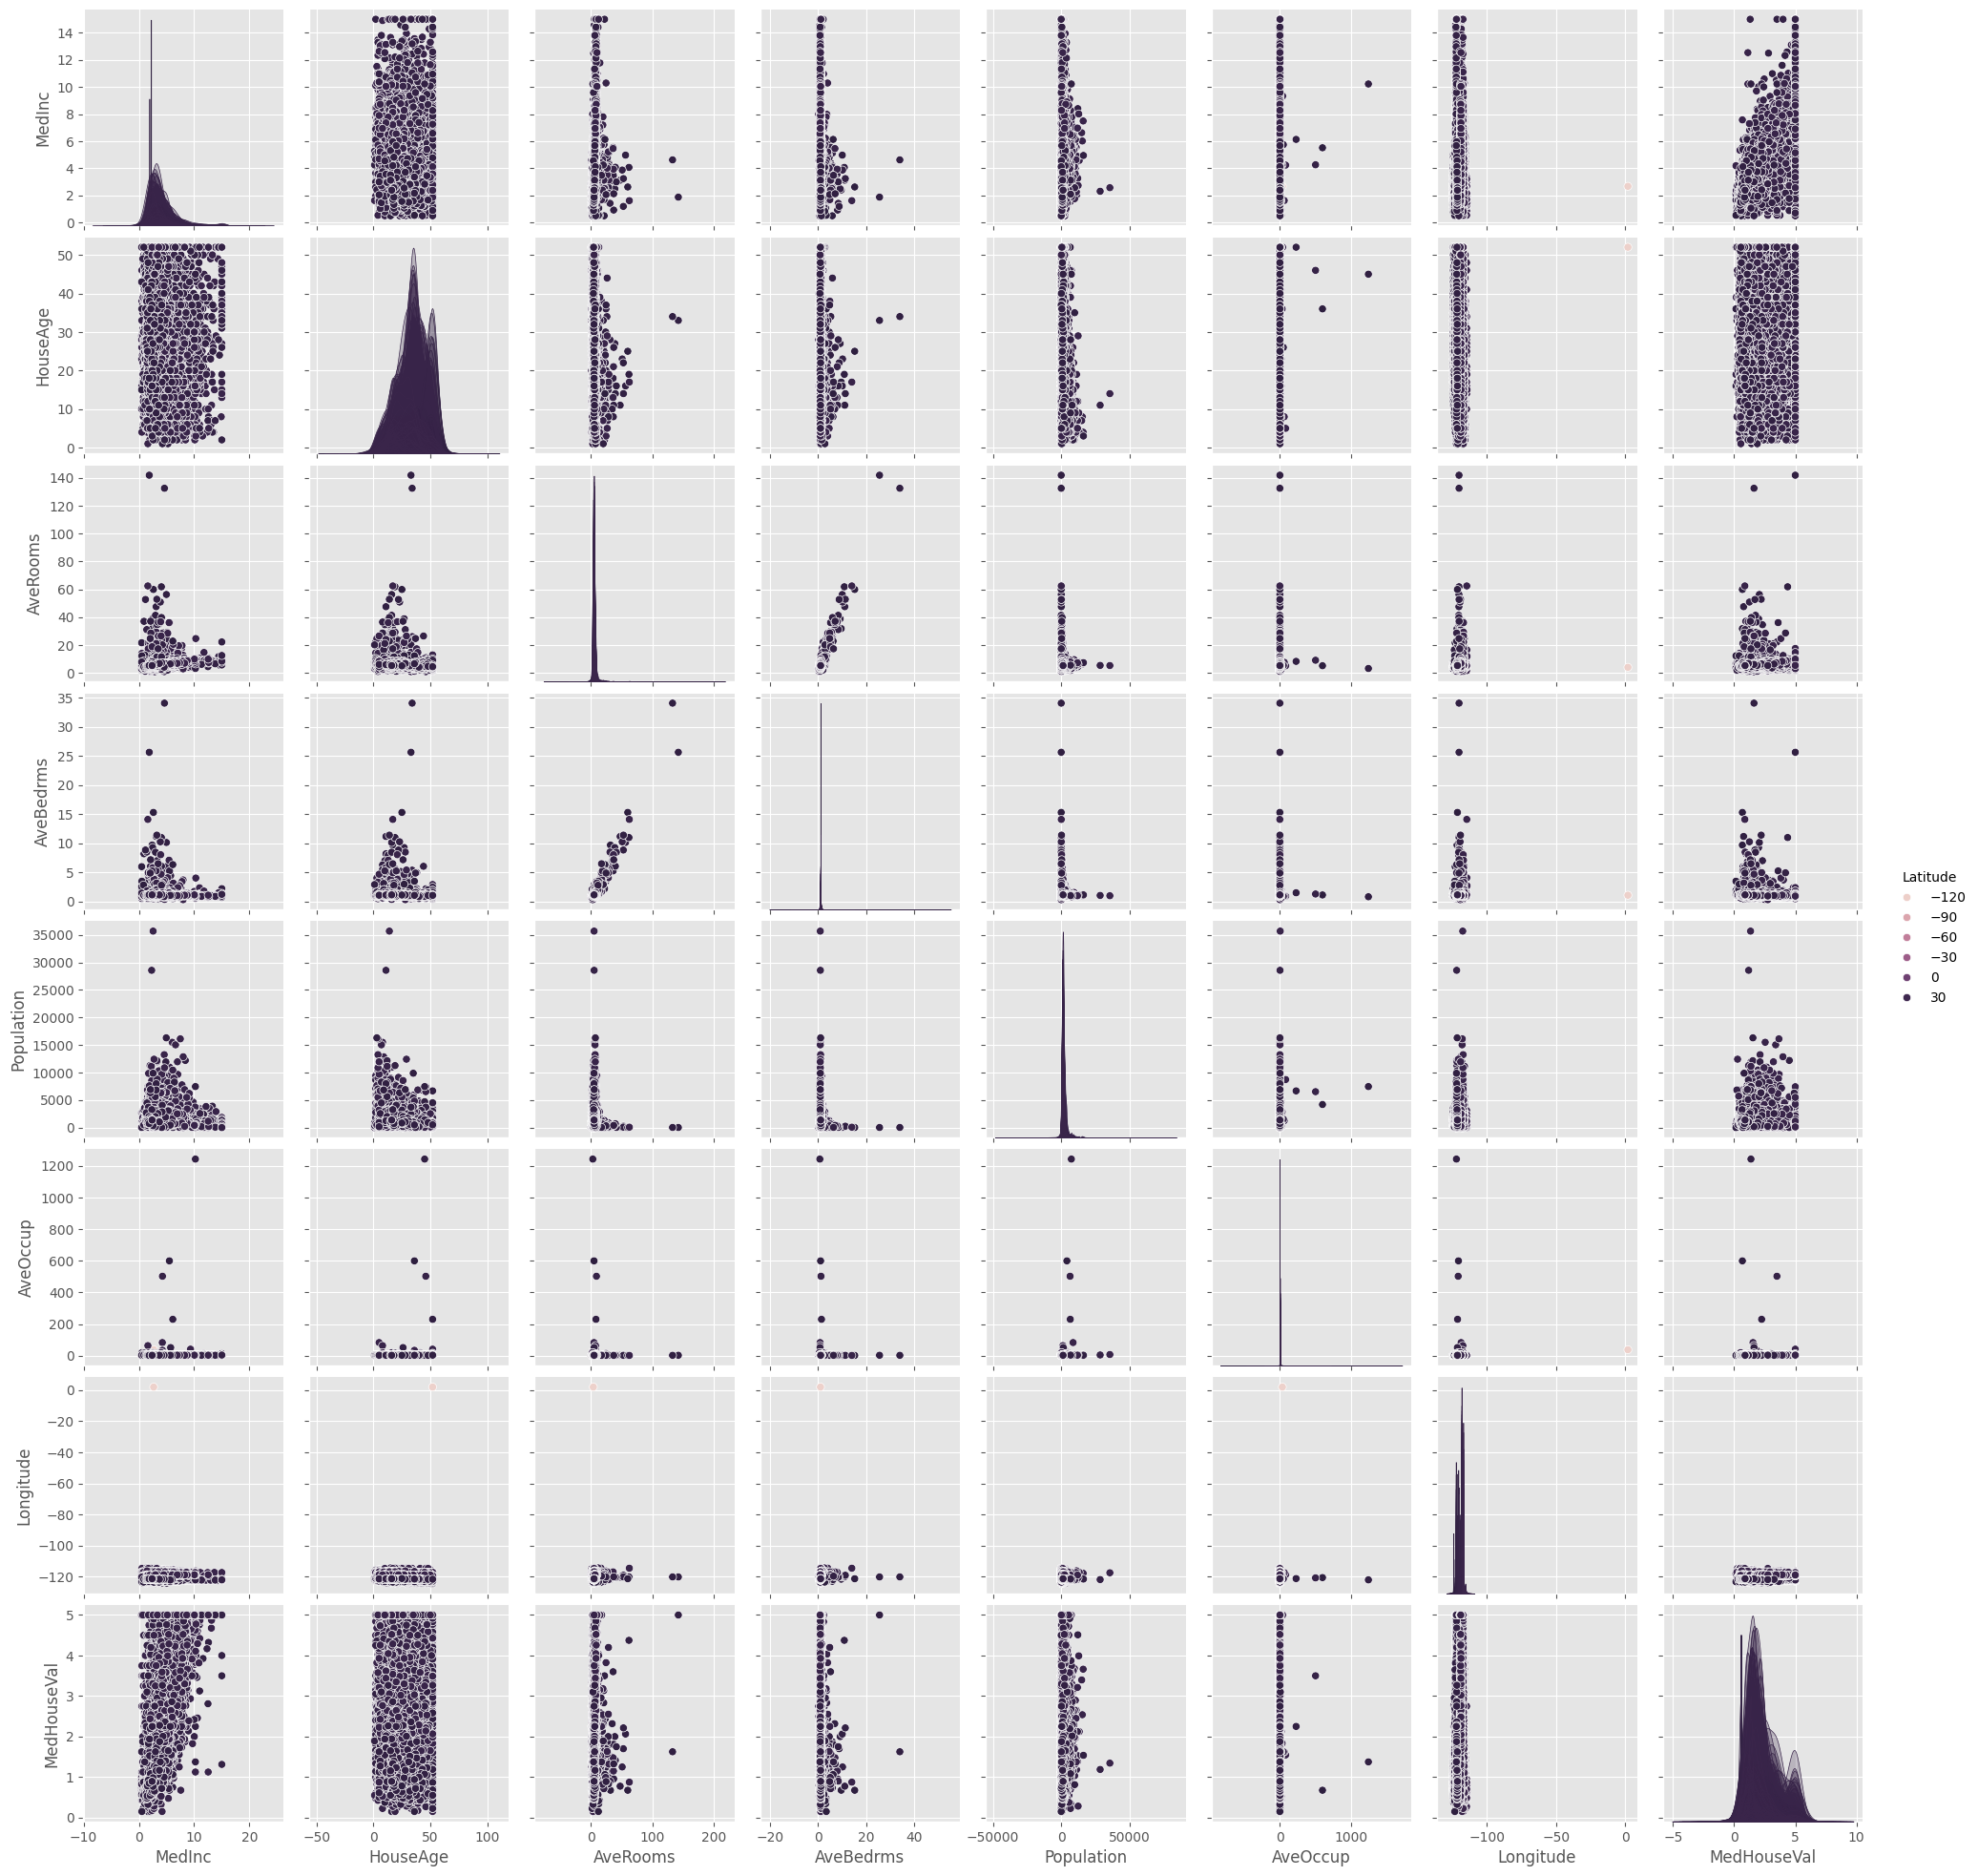

In [18]:
sns.pairplot(df, hue='Latitude', diag_kind='kde')
plt.show()

OLS-регрессия (Ordinary Least Squares Regression) - это статистический метод, который используется для нахождения наилучшей прямой линии, которая подходит к набору данных

In [24]:
import statsmodels.formula.api as sm

dependent_variable = 'MedHouseVal'
independent_variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                         'Population', 'AveOccup', 'Latitude', 'Longitude'] 

# Строим модель линейной регрессии
model = sm.ols(f'{dependent_variable} ~ {" + ".join(independent_variables)}', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3968.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:04:05   Log-Likelihood:                -22616.
No. Observations:               20630   AIC:                         4.525e+04
Df Residuals:                   20621   BIC:                         4.532e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9391      0.659    -56.030      0.0

Общий анализ модели:

- R-квадрат: 0.606 (60.6%). R-квадрат показывает, какая часть дисперсии зависимой переменной (в нашем случае, MedHouseVal - медианная стоимость дома) объясняется независимыми переменными, которые включены в модель.
- F-статистика: 3968, p-значение: 0.00. Очень высокая F-статистика с p-значением, близким к 0, указывает на то, что модель в целом является статистически значимой.
- AIC & BIC: 4.525e+04 и 4.532e+04 соответственно. Эти значения показывают, насколько "сложной" является модель. Низкие значения предпочтительнее, но для сравнения нужно иметь несколько моделей.

Анализ коэффициентов:

- MedInc: 0.4367, P>|t|: 0.00. Этот коэффициент показывает, что увеличение медианного дохода на единицу приводит к увеличению медианной стоимости дома примерно на 0.4367 единицы. Коэффициент статистически значим (p-значение 0.00), поэтому мы можем быть уверены в его действии.
- HouseAge: 0.0095, P>|t|: 0.00. Увеличение возраста дома на 1 год приводит к увеличению стоимости дома на 0.0095 единицы. Также статистически значим.
- AveRooms: -0.1073, P>|t|: 0.00. Увеличение среднего количества комнат на 1 приводит к снижению стоимости дома на 0.1073 единицы. Это может быть связано с тем, что увеличение количества комнат не всегда означает увеличение площади или улучшение качества дома.
- AveBedrms: 0.6451, P>|t|: 0.00. Увеличение среднего количества спален на 1 приводит к увеличению стоимости дома на 0.6451 единицы. Это показывает, что количество спален является значительным фактором при оценке стоимости дома.
- Population: -3.868e-06, P>|t|: 0.416. Этот коэффициент не является статистически значимым, поэтому мы не можем быть уверены в его действии. Это означает, что изменения в населении не оказывают заметного влияния на медианную стоимость дома.
- AveOccup: -0.0038, P>|t|: 0.00. Увеличение среднего количества людей на 1 приводит к снижению стоимости дома на 0.0038 единицы. Это может быть связано с тем, что большое количество людей в доме может снижать его привлекательность для покупателей.
- Latitude: -0.4212, P>|t|: 0.00. Увеличение широты (перемещение на север) на 1 градус приводит к снижению стоимости дома на 0.4212 единицы. 
- Longitude: -0.4345, P>|t|: 0.00. Увеличение долготы (перемещение на восток) на 1 градус приводит к снижению стоимости дома на 0.4345 единицы. 

Дополнительные данные:

- Omnibus: 4390.028. Это значение указывает на то, что остатки не распределены нормально. Это может означать, что модель не идеально подходит для данных, и можно попробовать использовать другие модели.
- Durbin-Watson: 0.885. Это значение указывает на возможную автокорреляцию остатков. Автокорреляция означает, что остатки не независимы, а это может привести к искаженным результатам.

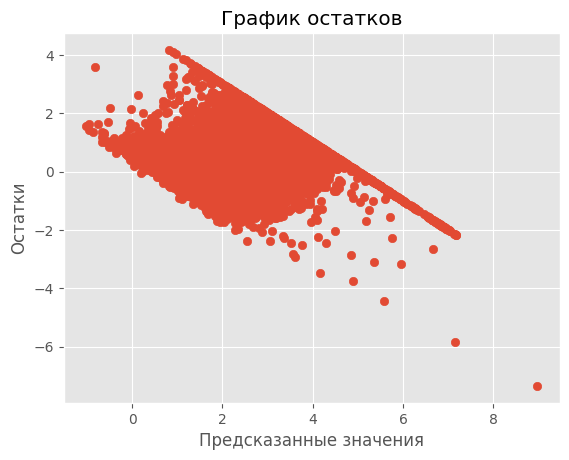

In [25]:
# График остатков
plt.figure()
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

#### Корреляция

<img src="images\img_corr.png" alt="corr" width="600"/>

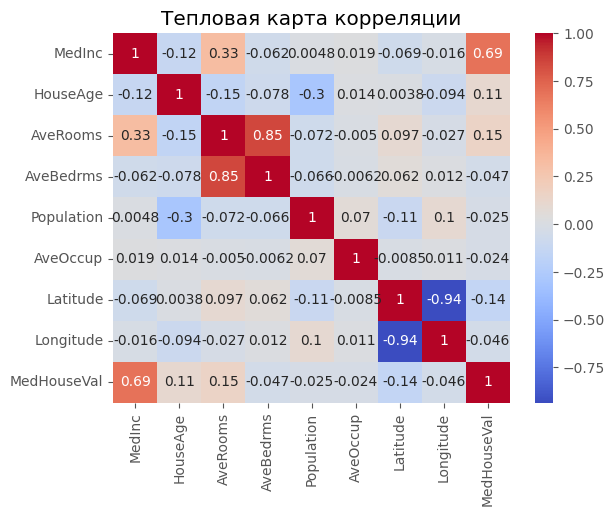

In [22]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

In [7]:
# отбор числовых колонок, если датасет содержит не только числовые столбцы
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedHouseVal']
[]


#### Поиск пропущенных значений и способы уcтранения

<Axes: >

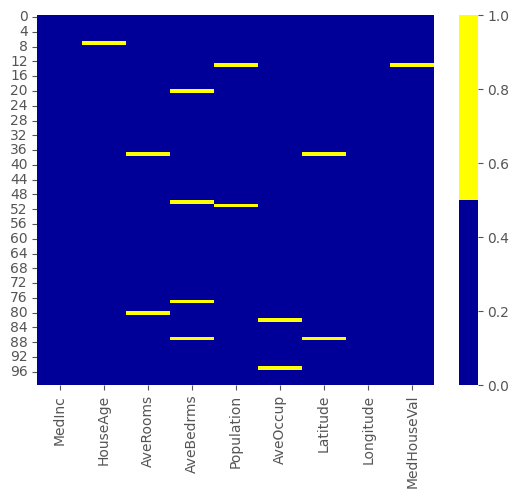

In [8]:
# тепловая карта пропущенных значений
cols = df.columns
colours = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df[cols][:100].isnull(), cmap=sns.color_palette(colours))

In [9]:
# Процентный список пропущенных данных
def get_percentage_skips(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, pct_missing*100))

get_percentage_skips(df)

MedInc - 0.0%
HouseAge - 0.004844726515188218%
AveRooms - 0.009689453030376436%
AveBedrms - 0.019378906060752873%
Population - 0.009689453030376436%
AveOccup - 0.009689453030376436%
Latitude - 0.009689453030376436%
Longitude - 0.0%
MedHouseVal - 0.004844726515188218%


In [10]:
# методы борьбы с пропущенными значениями
# Отбрасывание записей - ! Это решение подходит только в том случае, если недостающие данные не являются информативными !
df_cleaned = df.dropna()
get_percentage_skips(df_cleaned)

MedInc - 0.0%
HouseAge - 0.0%
AveRooms - 0.0%
AveBedrms - 0.0%
Population - 0.0%
AveOccup - 0.0%
Latitude - 0.0%
Longitude - 0.0%
MedHouseVal - 0.0%


In [11]:
# Отбрасывание признаков - ! Применяется, только если признак не несет никакой пользы !
cols_to_drop = ['MedHouseVal']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)
df_less_hos_beds_raion

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
# Внесение недостающих значений
# 1. Среднее значение: Используйте, если данные распределены нормально или близки к нормальному распределению.
df['MedInc'].fillna(df['MedInc'].mean(), inplace=True)
    
# 2. Медианное значение: Более устойчиво к выбросам, чем среднее значение.
df['HouseAge'].fillna(df['HouseAge'].median(), inplace=True)
    
# 3. Мода: Используйте для категориальных переменных или для числовых данных,  распределенных  не  нормально.
df['AveBedrms'].fillna(df['AveBedrms'].mode()[0], inplace=True)
    
# 4. Вперед-заполнение: Используйте для временных рядов или данных, где  последовательные  значения  зависят  друг  от  друга.
df['Population'].fillna(method='ffill', inplace=True)
    
# 5. Обратно-заполнение: Аналогично forward fill (4),  но  используется  для  заполнения  пропущенных  значений  в  конце  датафрейма.
df['AveOccup'].fillna(method='bfill', inplace=True)

# 6. Замена недостающих значений на свои
    # категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

    # численные признаки
df['Latitude'] = df['Latitude'].fillna(-999)

# 7. Методы машинного обучения: обучаем модель (например,  линейную  регрессию,  k-ближайших  соседей)  на  доступных  данных  
# и  используем  ее  для  предсказания  пропущенных  значений. Этот  метод  может  быть  более  точен,  чем  простые  методы  заполнения,  
# но  требует  более  сложного  кода  и  больше  времени  на  обучение.

#### Выбросы

<Axes: >

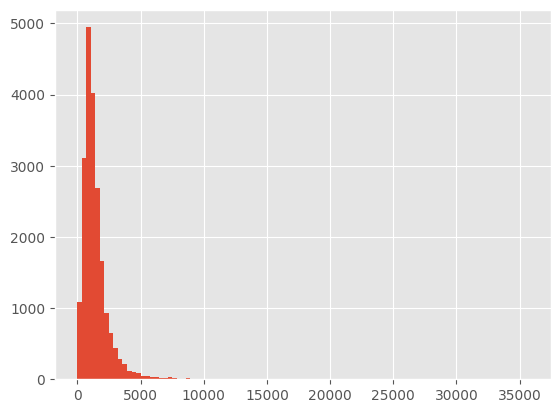

In [12]:
# Гистограмма/коробчатая диаграмма
df['Population'].hist(bins=100)

<Axes: >

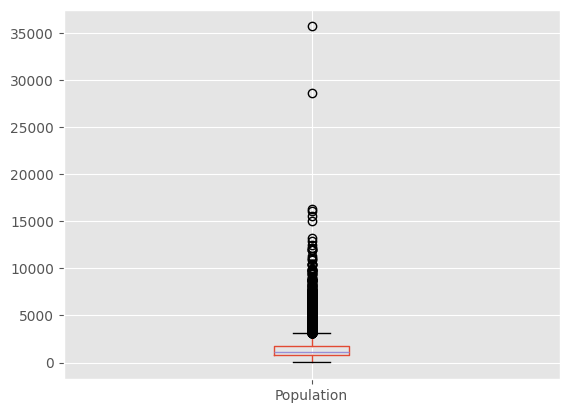

In [13]:
df.boxplot(column=['Population'])

<Axes: >

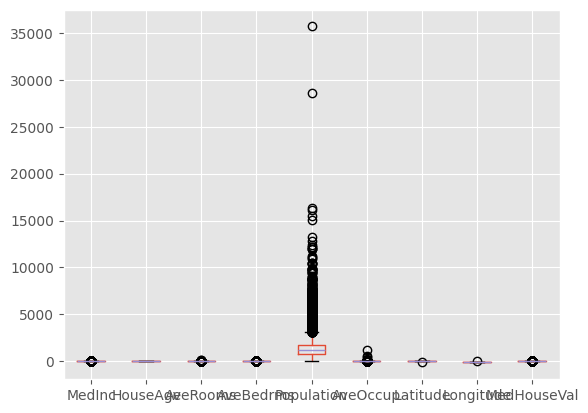

In [14]:
df.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20641.000000,20640.000000,20639.000000,20637.000000,20639.000000,20639.000000,20639.000000,20641.000000,20640.000000
mean,3.870599,28.637742,5.429181,1.096679,1425.544891,3.072484,35.624073,-119.563770,2.068509
std,1.899804,12.584815,2.474157,0.473945,1132.461771,10.389111,2.402163,2.174561,1.153985
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,-122.260000,-124.350000,0.149990
25%,2.562500,18.000000,4.440951,1.006061,787.000000,2.430150,33.930000,-121.800000,1.196000
50%,3.534700,29.000000,5.229213,1.048780,1166.000000,2.818408,34.260000,-118.490000,1.797000
75%,4.743100,37.000000,6.052381,1.099526,1725.000000,3.282276,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,1.913000,5.000010


Для обнаружения выбросов можно использовать другие методы, например, построение точечной диаграммы, z-оценку или кластеризацию.

In [16]:
# Обнаружение неинформативных признаков
# Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Нерелевантные признаки

Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости. Например, на жилье в Калифорнии не влияет количество людей в Токио

In [17]:
# Дубликаты записей
# отбрасываем неуникальные строки
df_dedupped = df.drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

# Другой распространенный способ вычисления дубликатов: по набору ключевых признаков. 
# Например, неуникальными можно считать записи с одной и той же долготой, широтой и средним количеством комнат и спален.

(20641, 9)
(20640, 9)
